<a href="https://colab.research.google.com/github/chitwan6804/Data_mining/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading the data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 13.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [ ]:
import pandas as pd
import os

file_path=os.path.join(path,"diabetes.csv")
df=pd.read_csv(file_path)

In [ ]:
df=pd.read_csv(file_path)

In [ ]:
correlation_matrix=df.corr()

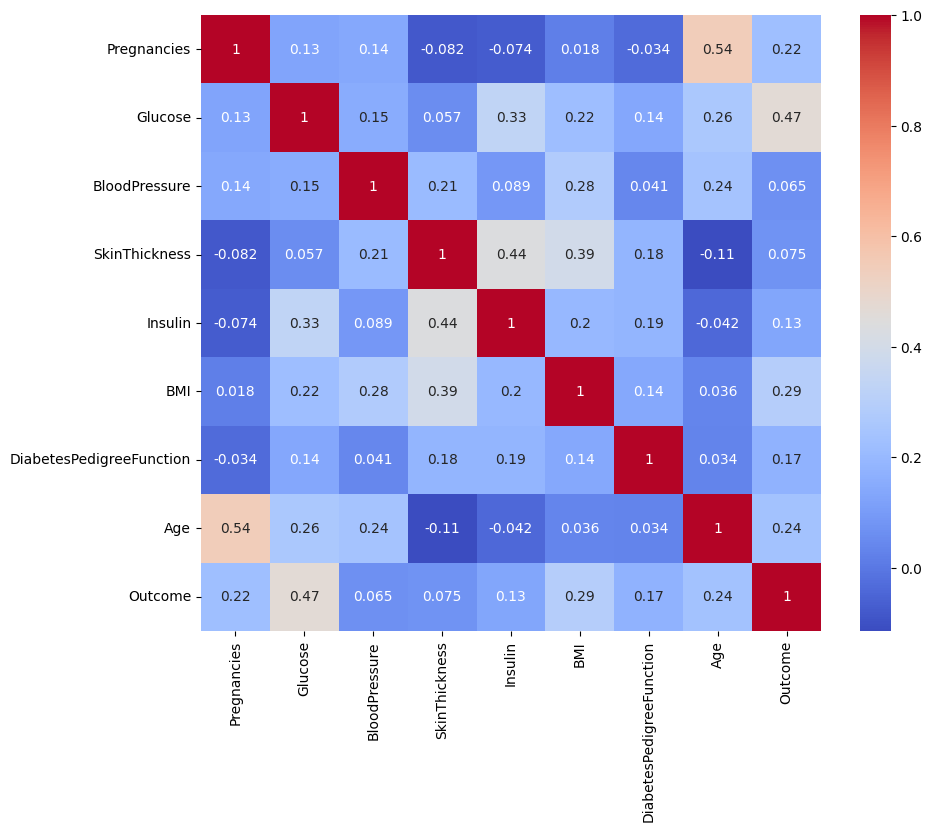

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load the dataset
data = load_breast_cancer()

# separate the features and target
X = data.data
y = data.target

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Standardize the features (Chi-Square test requires non-negative values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = abs(X_scaled)  # Convert to non-negative

# Apply Chi-Square test
chi_selector = SelectKBest(score_func=chi2, k=5)
X_new = chi_selector.fit_transform(X, y)

# Print selected feature indices
print("Selected Features Indices:", chi_selector.get_support(indices=True))


Selected Features Indices: [ 3 10 13 20 23]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
X_new = rfe.fit_transform(X, y)
print("Selected Features:", rfe.get_support(indices=True))

Selected Features: [ 7 20 22 23 27]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
selector = SelectFromModel(lasso, prefit=True)
X_new = selector.transform(X)
print("Selected Features:", selector.get_support(indices=True))

Selected Features: [ 1  3 13 20 21 22 23 26]


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, RFECV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Load the dataset (make sure to define 'file_path' with the correct path)
diabetes = pd.read_csv(file_path)

# Split the dataset into features and target variable
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Apply univariate feature selection using the chi-square test
selector = SelectKBest(chi2, k=4)
X_new = selector.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Fit a logistic regression model on the selected features
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print("Accuracy using univariate feature selection: {:.2f}".format(accuracy))

# Recursive feature elimination with cross-validation (RFECV)
estimator = LogisticRegression(max_iter=500)
selector = RFECV(estimator, step=1, cv=5)
selector.fit(X, y)
X_new = selector.transform(X)
scores = cross_val_score(LogisticRegression(max_iter=500), X_new, y, cv=5)
print("Accuracy using RFECV feature selection: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

# PCA implementation
pca = PCA(n_components=5)
X_new = pca.fit_transform(X)
scores = cross_val_score(LogisticRegression(max_iter=500), X_new, y, cv=5)
print("Accuracy using PCA feature selection: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))


Accuracy using univariate feature selection: 0.74
Accuracy using RFECV feature selection: 0.77 (+/- 0.04)
Accuracy using PCA feature selection: 0.75 (+/- 0.07)
